<a href="https://colab.research.google.com/github/bsmiranda/Data_Science/blob/main/01_Analyzing_movie_data_from_MovieLens_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Movie Data from MovieLens

MovieLens is a movie recommendation system for its users to watch, based on their preferences.
In this notebook, we will analyze a MovieLens movie dataset, performing exploratory data analysis using Python and libraries such as Pandas, Matplotlib, and Seaborn.

Project path:

1. Knowing our database;
2. Visualize the data with histograms and boxplot;
3. Exploratory data analysis;
4. View charts by category;
5. Visualization refinement;
6. Statistical data (mean, median, standard deviation, boxplot, histogram, central tendency and dispersion)

## Getting the Data

The database used in this project can be found at [grouplens.org](https://grouplens.org/datasets/movielens/). 

We will use a dataset with 100,000 ratings applied to 9,000 movies by 600 users.

Download the database here: [ml-latest-small.zip](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip)

In [1]:
import pandas as pd

notes = pd.read_csv("ratings.csv")
notes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notes.shape

(100836, 4)

### Unique values of Series object

Unique values are returned in the order they appear. Notes are not sorted.

In [3]:
notes["rating"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

### Sorting notes from most frequent to least frequent note

With the .value_counts() method, return the scores results in descending order (from most frequent to least frequent).

In our dataset, note 4 was the most frequent, appearing 11,781 times, followed by notes 3 and 4, which appeared 8,533 times and 6,093 times, respectively.

Grades 1, 1.5 and 0.5 were the least frequent in our dataset.

In [4]:
notes["rating"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

### Checking the mean and median of the ratings

Series.mean() gives us the average of the notes which is calculated by adding all the values of a data set and dividing them by the number of elements in the set.

Series.median() gives us the median of the scores that represents the central value of a data set. The median is obtained by placing the values in ascending or descending order. If the number of elements is even, add the two central values and divide them by two.

Coincidentally, the mean and median are 3.5. This doesn't always happen when it comes to mean and median.

In [5]:
print("Mean",notes["rating"].mean().round(2)) # Rounding to two decimal places
print("Median",notes["rating"].median())

Mean 3.5
Median 3.5


### Plotting the data

We can plot the notes on a histogram using .plot(kind='hist') and thus visualize the notes on the x-axis and the frequency of the notes on the y-axis.
Here we can see that indeed, note 4 was the most frequent, followed by notes 3 and 5.

<Axes: ylabel='Frequency'>

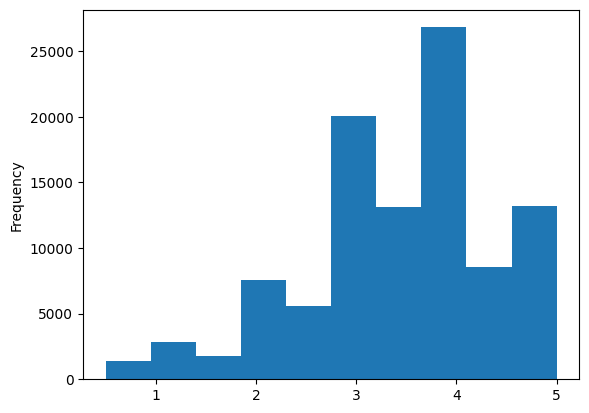

In [6]:
notes["rating"].plot(kind='hist')

### Descriptive statistics about the data.

.describe() generates for us a descriptive statistics of the data as the average, minimum, maximum, lower percentile and upper percentile...

In [7]:
notes["rating"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

### Using Seaborn

Seaborn.boxplot() gives us a boxplot that allows us to visualize the distribution and outliers (outliers). Notes 3 and 4 were the most frequent, representing 50% of all notes. Grades from 4 to 5 represent 25% and grades from 1.5 to 3 represent the other 25% of the grades.

The grades 0.5 and 1 appeared very little in our database. They are the outliers.

<Axes: >

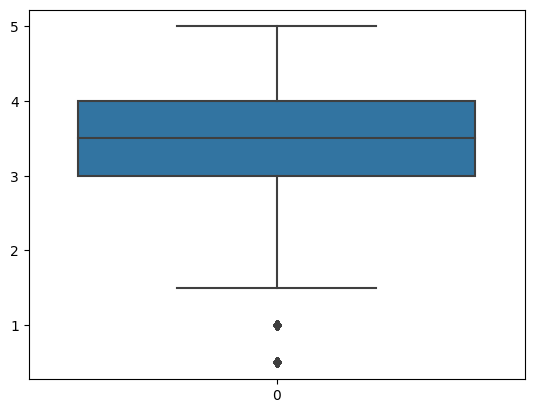

In [8]:
import seaborn as sns

sns.boxplot(notes["rating"])

## Analyzing the notes of some films

In [31]:
films = pd.read_csv('movies.csv')
films.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
notes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Analyzing the movie grade point average of Toy Story

We can get the average rating for a given movie using .query(), which basically works like a boolean expression. This way, we can use .query() to ask which movie has the Id we want to check and return the rating value for that movie.

In [45]:
# Toy Story movie average ratings, movieId = 1.
notes.query("movieId==1")['rating'].mean()

3.9209302325581397

In [46]:
# Jumanji movie averagy ratings, movieId = 2
notes.query("movieId==2")['rating'].mean()

3.4318181818181817

### Grouping all movies

Doing this film by film is a very time consuming process. The groupby command can help us to check movie scores at once. This can be used to group large amounts of data and calculate operations on those groups.

After grouping by movies, we were able to get average scores for all movies at once.

In [49]:
average_per_film = notes.groupby('movieId').mean()['rating'] # Extracting only the 'rating' column
average_per_film.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

### Plotting the distribution of grade averages

The histogram below shows us that average grades 3, 3.5 and 4 are the most frequent.

<Axes: ylabel='Frequency'>

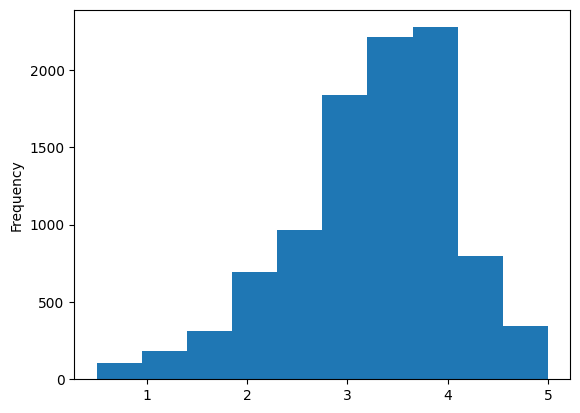

In [50]:
average_per_film.plot(kind='hist')